In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("data.csv")


In [8]:
data.replace("?", np.nan, inplace= True)
data = data.astype({"age":np.float64, "fare": np.float64})

&lt;matplotlib.axes._subplots.AxesSubplot at 0x152d45eb5c8&gt;

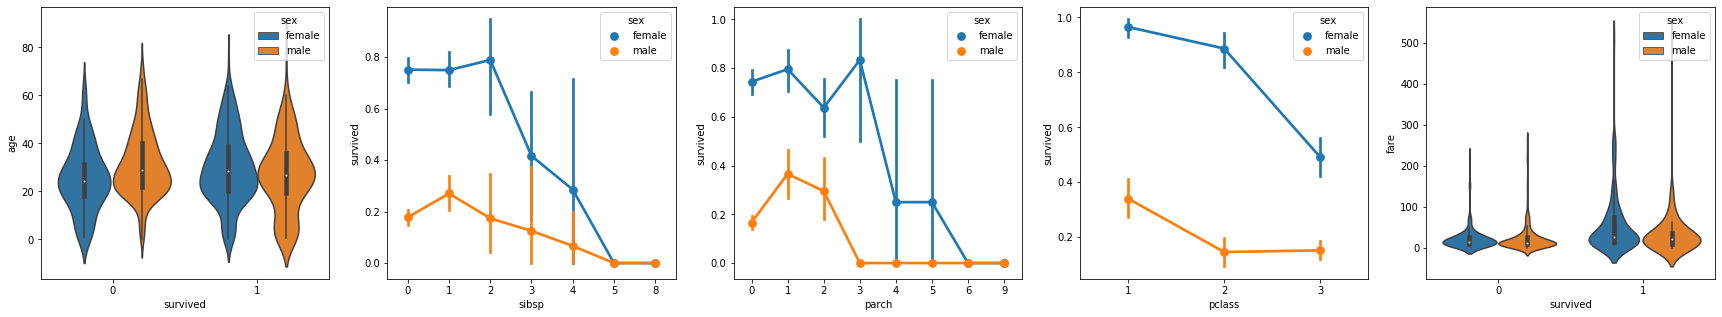

In [9]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [14]:
data.replace({"male": 1, "female":0}, inplace = True)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [17]:
data["relatives"] = data.apply (lambda row: int((row["sibsp"] + row["parch"]) > 0), axis = 1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [25]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [40]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.summary()



Model: &quot;sequential_1&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5718
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.5933
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.6974
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.7656
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.7691
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6352 - accuracy: 0.7691
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6157 - accuracy: 0.7679
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6004 - accuracy: 0.7715
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.7715
Epoch 11/50
27/27 [

&lt;tensorflow.python.keras.callbacks.History at 0x152de61c448&gt;

In [42]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) &gt; 0.5).astype(&quot;int32&quot;)`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.7990430622009569
